In [1]:
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
import src.trainers as tr
import src.read_pic as rp
import os
# Fields to read.
fields_to_read={"B":True,"B_ext":False,"divB":False,"E":True,"E_ext":False,"rho":True,"J":True,
                "P":True,"PI":False,"Heat_flux":False,"N":False,"Qrem":False}
# Path of the folder containing the .h5 files to read.
files_path="/volume1/scratch/share_dir/ecsim/peppe/" #"/lustre1/project/stg_00032/share_dir/brecht/" # "/users/cpa/francesc/share_dir/SW/data_small/" #"/users/cpa/francesc/share_dir/jincai/dat_FF2D07e/" #="/users/cpa/francesc/share_dir/nn/data/raw_data/"
experiments = [f.name for f in os.scandir(files_path) if f.is_dir()]
print(f"{experiments = }")

experiments = ['data', 'T2D10c1_filter2', 'T2D12_filter2', 'T2D12', 'T2D10_filter2', 'data_filter', 'T2D13_filter2', 'T2D15_filter2', 'data_filter2', 'T2D16_filter2', 'T2D14_filter2']


In [2]:
experiment = 'T2D13_filter2'
species = 'e'
data, X, Y, qom, times = rp.get_exp_times([experiment], files_path, fields_to_read, choose_times=1, choose_species=['e','i'], verbose=True)
data = data[experiment]

INFO:src.read_pic: reading /volume1/scratch/share_dir/ecsim/peppe//T2D13_filter2/SimulationData.txt
INFO:src.read_pic:Lx = 64.0, Ly = 64.0, nxc = 512, nyc = 512
INFO:src.read_pic:loading B
INFO:src.read_pic:loading E
INFO:src.read_pic:loading rho
INFO:src.read_pic:loading J
INFO:src.read_pic:loading P and/or PI
INFO:src.read_pic:Component Pyx for species e missing because tensor is symmetric
INFO:src.read_pic:Component Pyx for species i missing because tensor is symmetric
INFO:src.read_pic:Component Pzx for species e missing because tensor is symmetric
INFO:src.read_pic:Component Pzx for species i missing because tensor is symmetric
INFO:src.read_pic:Component Pzy for species e missing because tensor is symmetric
INFO:src.read_pic:Component Pzy for species i missing because tensor is symmetric
INFO:src.read_pic:loading Ppar and Pperp
INFO:src.read_pic:loading Ppar and Pperp
INFO:src.read_pic:choose_x = [0, 512], choose_y = [0, 512], choose_z = [0, 1], choose_times =1


In [5]:
import src.utilities as ut
ut.get_Az(X[:,0],Y[0,:],data)

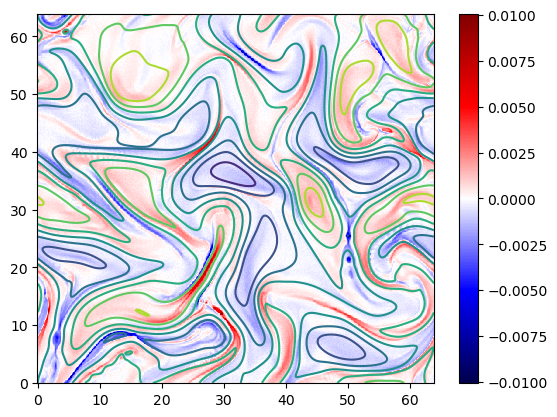

In [14]:
import matplotlib.pyplot as plt
Jz = data['Jz']['e']+data['Jz']['i']
plt.pcolormesh(X,Y, Jz[...,15], cmap='seismic', vmax=Jz[...,15].max(), vmin=-Jz[...,15].max())
plt.colorbar()
plt.contour(X,Y,data['Az'][...,15])

field = 'Bx' mu = -3.6663673317468844e-06 std = 0.007979445433182032
field = 'By' mu = 4.306802552330309e-06 std = 0.007427864899978521
field = 'Bz' mu = 0.009996479239645193 std = 0.006228337064852191
field = 'Ex' mu = -2.8897370084721227e-06 std = 0.00019861089713286187
field = 'Ey' mu = -2.246773228170983e-06 std = 0.0001989038919074115
field = 'Ez' mu = -1.1513308482012459e-07 std = 0.0001602586893243432
field = 'Jx' mu = 1.1650167542484109e-07 std = 0.0009853916991831842
field = 'Jy' mu = 3.2705582736719113e-07 std = 0.0009902819163844327
field = 'Jz' mu = 2.861396056734059e-07 std = 0.0009607698414104278
field = 'rho' mu = -0.07956160727922064 std = 0.018491785474532525
field = 'Pxx' mu = 1.0535921479542486e-05 std = 3.50845356371473e-06
field = 'Pyy' mu = 1.0512495608218644e-05 std = 3.4900190249204085e-06
field = 'Pzz' mu = 1.0302006325355925e-05 std = 3.31696098523068e-06
field = 'Pxy' mu = 5.448214494959582e-09 std = 4.919988979100167e-07
field = 'Pxz' mu = 8.961837671535728e

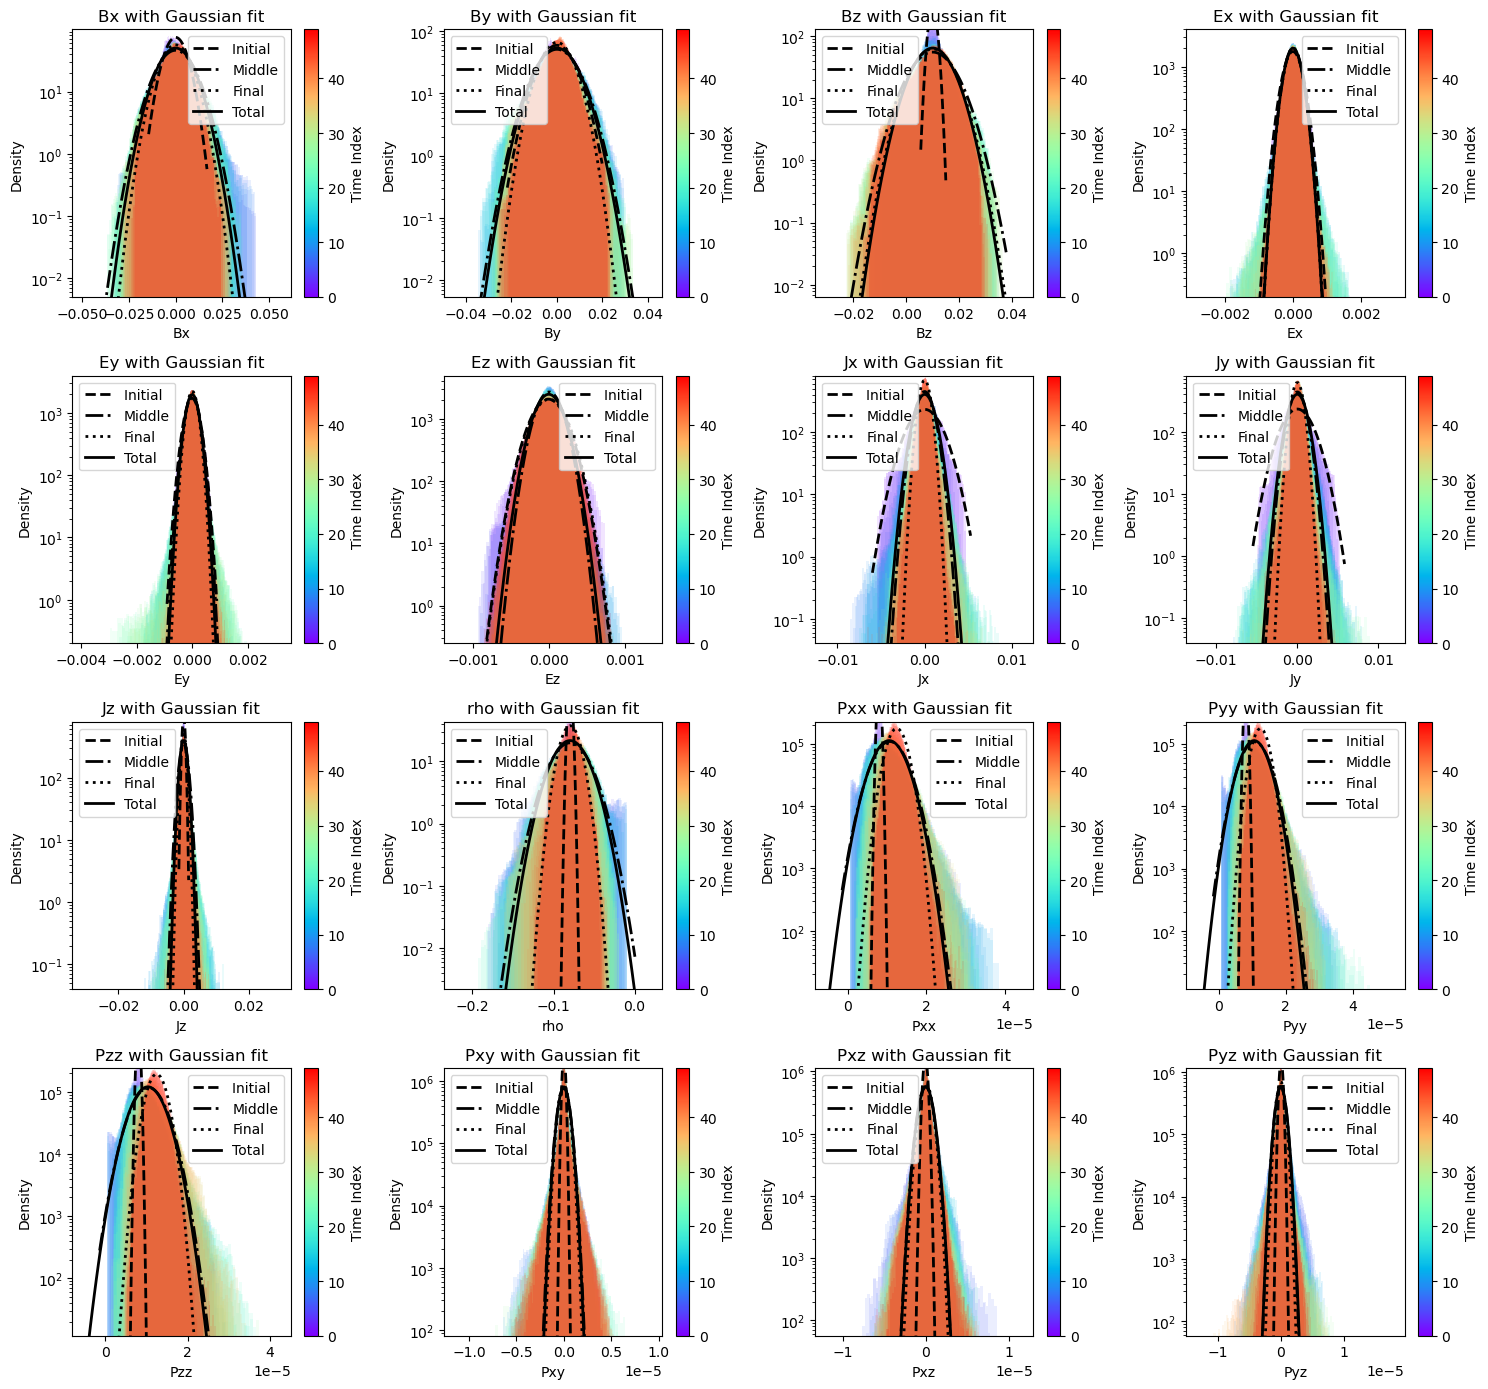

In [7]:
from scipy.stats import norm
species = 'e'
import numpy as np
fields = ['Bx', 'By', 'Bz', 'Ex', 'Ey', 'Ez','Jx','Jy','Jz', 'rho', 'Pxx', 'Pyy', 'Pzz', 'Pxy', 'Pxz', 'Pyz']
num_fields = len(fields)

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 14))

for i, field in enumerate(fields):
    
    ax = axes.flat[i]
    
    if field in ['Jx', 'Jy', 'Jz', 'rho', 'Pxx', 'Pyy', 'Pzz', 'Pxy', 'Pxz', 'Pyz']:
        field_flat = data[field][species].flatten()
        iters = data[field][species].shape[-1]
    else:
        field_flat = data[field].flatten()
        iters = data[field].shape[-1]

    # Fit a Gaussian to the data
    mu, std = norm.fit(field_flat)

    print(f"{field = } {mu = } {std = }")

    colors = plt.cm.rainbow(np.linspace(0, 1, iters))

    for time in range(iters):
        if field in ['Jx', 'Jy', 'Jz', 'rho', 'Pxx', 'Pyy', 'Pzz', 'Pxy', 'Pxz', 'Pyz']:
            field_flat = data[field][species][...,time].flatten()
        else:
            field_flat = data[field][...,time].flatten()
        # Compute mean and standard deviation
        mean_field = np.mean(field_flat)
        std_field = np.std(field_flat)
        #print(f"{mean_field = } {std_field = }")
        # Plot histogram
        ax.hist(field_flat, bins=50, density=True, alpha=0.1, color=colors[time])
        if time == 1:
            # Plot the Gaussian fit
            xmin, xmax = ax.get_xlim()
            mu1, std1 = norm.fit(field_flat)
            x = np.linspace(xmin, xmax, 100)
            p1 = norm.pdf(x, mu1, std1)
            ax.plot(x, p1, 'k', linestyle='dashed', linewidth=2, label=f'Initial ') #Mean: {mu1:.2e}, Std: {std1:.2e}')
        elif time == iters//2:
            # Plot the Gaussian fit
            xmin, xmax = ax.get_xlim()
            mu1, std1 = norm.fit(field_flat)
            x = np.linspace(xmin, xmax, 100)
            p1 = norm.pdf(x, mu1, std1)
            ax.plot(x, p1, 'k', linestyle='dashdot', linewidth=2, label=f'Middle')
        elif time == iters - 1:
            # Plot the Gaussian fit
            xmin, xmax = ax.get_xlim()
            mu1, std1 = norm.fit(field_flat)
            x = np.linspace(xmin, xmax, 100)
            p1 = norm.pdf(x, mu1, std1)
            ax.plot(x, p1, 'k', linestyle='dotted', linewidth=2, label=f'Final') # Mean: {mu1:.2e}, Std: {std1:.2e}')


    # Add colorbar
    sm = plt.cm.ScalarMappable(cmap='rainbow', norm=plt.Normalize(vmin=0, vmax=iters-1))
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label('Time Index')
    
    # Plot the Gaussian fit
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    ax.plot(x, p, 'k', linewidth=2, label=f'Total') # {mu:.2e}, Std: {std:.2e}')
    
    ax.set_xlabel(field)
    ax.set_ylabel('Density')
    ax.set_title(f'{field} with Gaussian fit')
    ax.legend()
    ax.set_yscale('log')
    #print(field_flat.max())
    try:
        ax.set_ylim(p.max()/1e4, 2*p.max())
    except:
        pass


plt.tight_layout()
plt.show()